In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
# Hypothetically loading a dataset
data = pd.read_csv('D:\PYTHON\Edunet2.0\day-6\sustainability_data.csv')

In [6]:
X = data[['Energy_Consumption', 'Renewable_Percentage', 'GDP']]
y = data['CO2_Emissions']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the degree of the polynomial
# You can adjust the degree as needed
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [8]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_poly_test)

In [10]:
y_pred 

array([ 734.07298491,  874.62164867,  947.22015401,  858.08950479,
       1027.78382866])

In [11]:
# Calculate Mean Squared Error or R² Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 2341.113415865091
R² Score: 0.06978468409668914


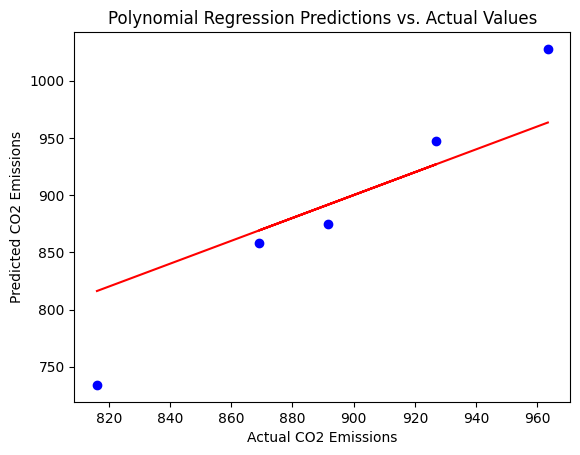

In [12]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # 45-degree line
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Polynomial Regression Predictions vs. Actual Values')
plt.show()

In [13]:
import joblib
# Save the model to a file
joblib.dump(model, 'polynomialRegModel.pkl')

['polynomialRegModel.pkl']